<a href="https://colab.research.google.com/github/roshanappa/Time-Series-Analysis-Projects-/blob/master/Time_Series_Forecasting_by_using_FbProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

!pip install fbprophet


!pip install pystan

# Forecasting Time Series Data Using Facebook FbProphet.

Steps Required With FbProphet

- Introduction And Installation
- Data Preprocessing With Time Seires
- Model Fitting
- Obtaining The Forecasts
- Plotting The Forecasts
- Cross Validation
- Computing Performance Metrics
- Visualize the Performance MEtrics
- Conclusions

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import fbprophet
%matplotlib inline

In [126]:
data = pd.read_csv('monthly-milk-production-pounds.csv')

In [127]:
  data.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [128]:
data.columns = ['Date','Production Of Milk']

In [129]:
data.tail()

,Date,Production Of Milk
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [130]:
data.isnull().sum()

Date                  0
Production Of Milk    1
dtype: int64

In [131]:
data.dropna(inplace=True)

In [132]:
data.shape

(168, 2)

In [133]:
data.dtypes

Date                   object
Production Of Milk    float64
dtype: object

In [134]:
round(data.describe(),1)

,Production Of Milk
count,168.0
mean,754.7
std,102.2
min,553.0
25%,677.8
50%,761.0
75%,824.5
max,969.0


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                168 non-null    object 
 1   Production Of Milk  168 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB


FbProphet Library Link :- https://facebook.github.io/prophet/docs/quick_start.html#python-api

## Data Visualization and Data Preprocessing.

In [136]:
data['Date'] = pd.to_datetime(data['Date'])

In [137]:
data.set_index(data['Date'],inplace=True)

In [138]:
data.head()

,Date,Production Of Milk
Date,,
1962-01-01,1962-01-01,589.0
1962-02-01,1962-02-01,561.0
1962-03-01,1962-03-01,640.0
1962-04-01,1962-04-01,656.0
1962-05-01,1962-05-01,727.0


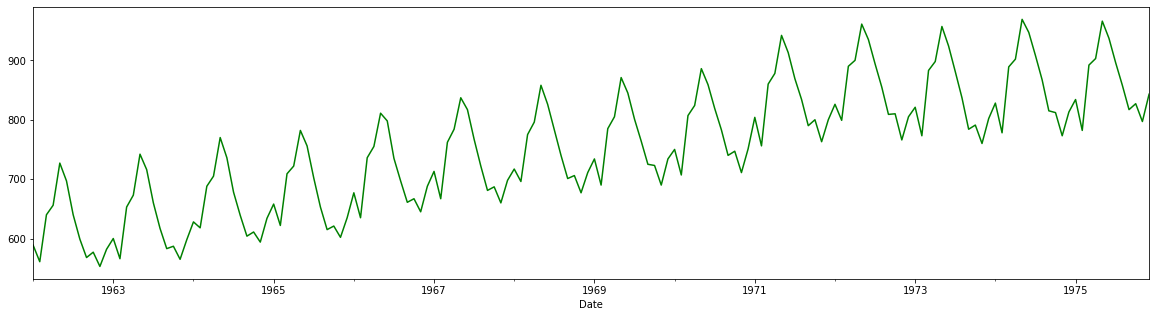

In [139]:
data['Production Of Milk'].plot(kind='line',figsize=(20,5),color='g')
plt.show()

Data is looking with some seasonality and trend.

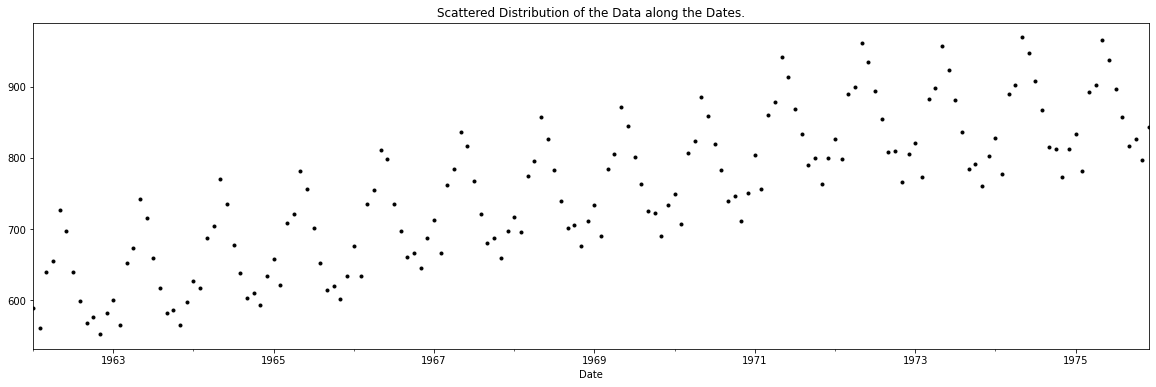

In [140]:
data['Production Of Milk'].plot(style='.k',figsize=(20,6),title='Scattered Distribution of the Data along the Dates.')
plt.show()

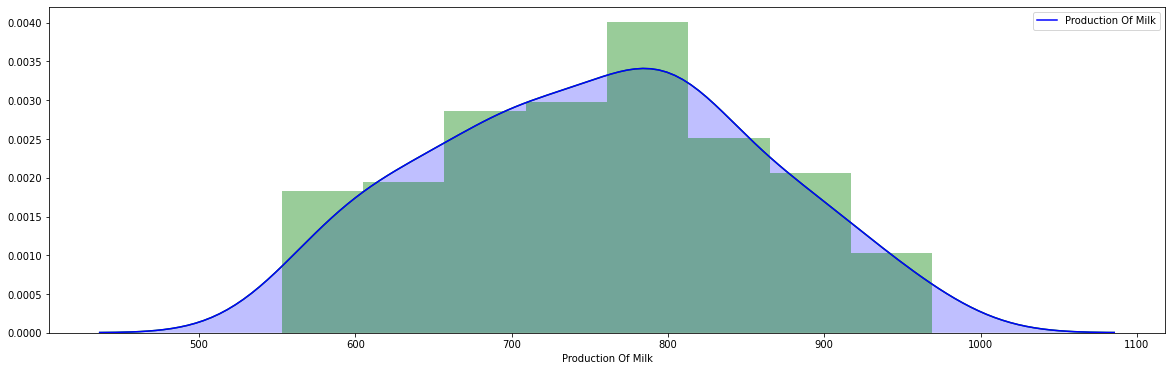

In [141]:
plt.figure(figsize=(20,6))
ax = sns.distplot(data['Production Of Milk'],color='g')
sns.kdeplot(data['Production Of Milk'],color='b',shade=True)
plt.show()

In [142]:
data1962=data['1962']['Production Of Milk']
data1963=data['1963']['Production Of Milk']
data1964=data['1964']['Production Of Milk']
data1973 = data['1973']['Production Of Milk']
data_months = data['1962'].index.month

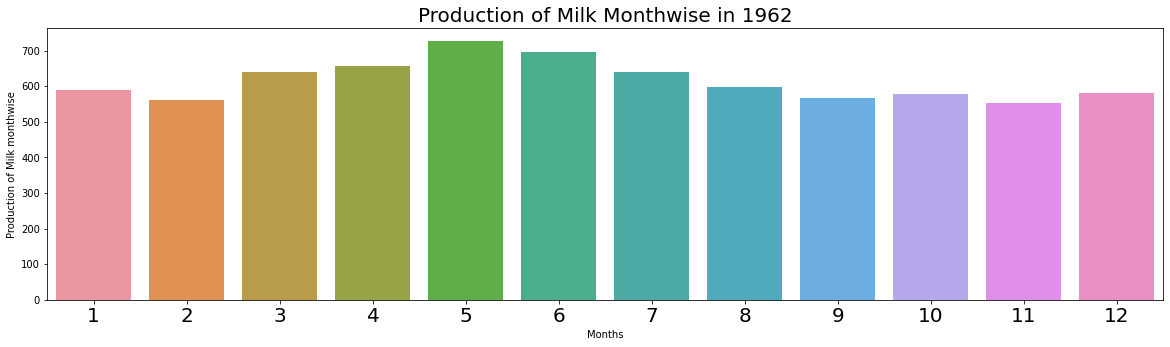

In [143]:
plt.figure(figsize=(20,5))
sns.barplot(data_months,data1962)
plt.xlabel('Months')
plt.ylabel('Production of Milk monthwise')
plt.title('Production of Milk Monthwise in 1962',fontsize=20)
plt.xticks(fontsize=20)
plt.show()

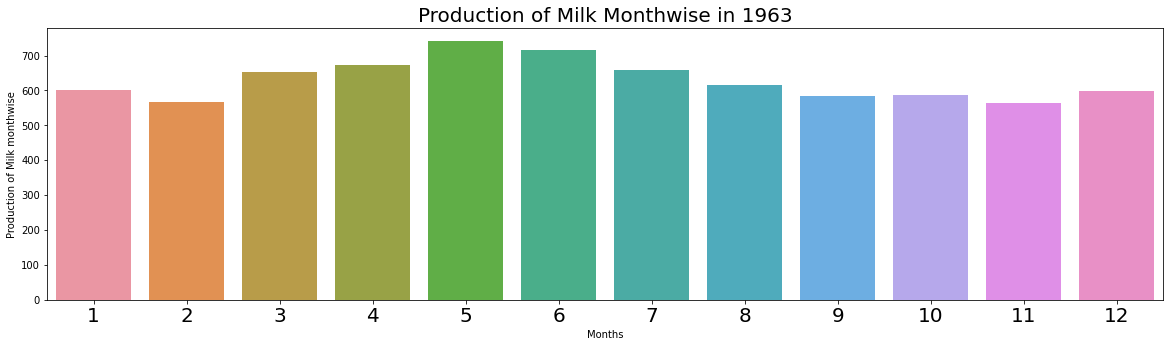

In [144]:
plt.figure(figsize=(20,5))
sns.barplot(data_months,data1963)
plt.xlabel('Months')
plt.ylabel('Production of Milk monthwise')
plt.title('Production of Milk Monthwise in 1963',fontsize=20)
plt.xticks(fontsize=20)
plt.show()

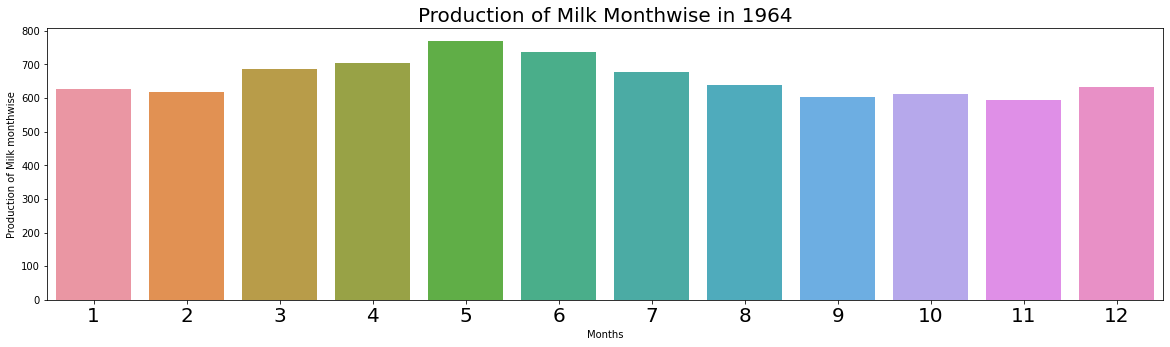

In [145]:
plt.figure(figsize=(20,5))
sns.barplot(data_months,data1964)
plt.xlabel('Months')
plt.ylabel('Production of Milk monthwise')
plt.title('Production of Milk Monthwise in 1964',fontsize=20)
plt.xticks(fontsize=20)
plt.show()

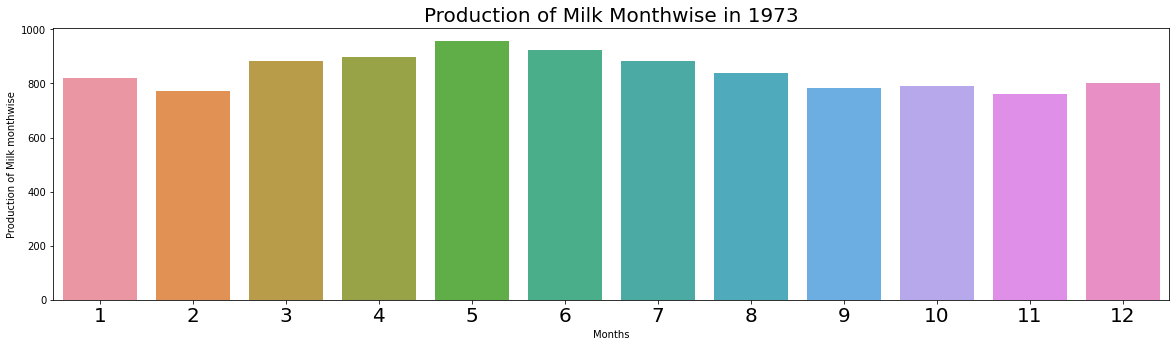

In [146]:
plt.figure(figsize=(20,5))
sns.barplot(data_months,data1973)
plt.xlabel('Months')
plt.ylabel('Production of Milk monthwise')
plt.title('Production of Milk Monthwise in 1973',fontsize=20)
plt.xticks(fontsize=20)
plt.show()

So it looks like a monthwsie trade we can we observed that in month of May and june production and in the dec,sept,nov production is quite low.
But is increasing year by year.

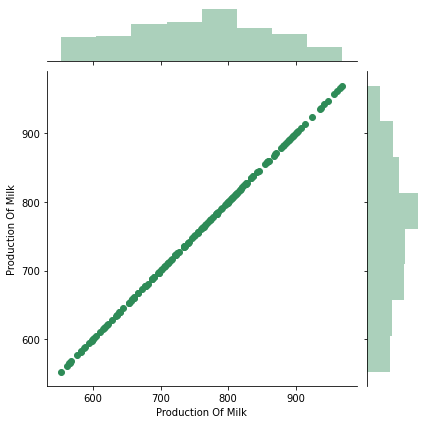

In [147]:
sns.jointplot(data['Production Of Milk'],data['Production Of Milk'], color='seagreen')
plt.show()

Production of the Milk inbetween the 600 and 900 is very high.
From the above we can say data is non-stationary but we will proof with statstical way.

How to identify It is Non-Stationary Series.

In [148]:
from statsmodels.tsa.stattools import adfuller
ada_score,p_values,usedlag,nobs,critical_values,icbest=adfuller(data['Production Of Milk'])

In [149]:
def is_stationary(series):
  from statsmodels.tsa.stattools import adfuller
  ada_score,p_values,usedlag,nobs,critical_values,icbest=adfuller(series)
  print(p_values)

  if p_values>=0.05:
    print('It is Seasonal Series.')
  else:
    print('It is Stationary Series.')

In [150]:
is_stationary(data['Production Of Milk'])

0.6274267086030337
It is Seasonal Series.


## Make It seasonal data.

In [151]:
data['Production Of Milk'].shift(1).head()

Date
1962-01-01      NaN
1962-02-01    589.0
1962-03-01    561.0
1962-04-01    640.0
1962-05-01    656.0
Name: Production Of Milk, dtype: float64

In [152]:
data['Diffrence Prediction'] = data['Production Of Milk'] - data['Production Of Milk'].shift(1)

In [153]:
data['Diffrence Prediction'].dropna().head()

Date
1962-02-01   -28.0
1962-03-01    79.0
1962-04-01    16.0
1962-05-01    71.0
1962-06-01   -30.0
Name: Diffrence Prediction, dtype: float64

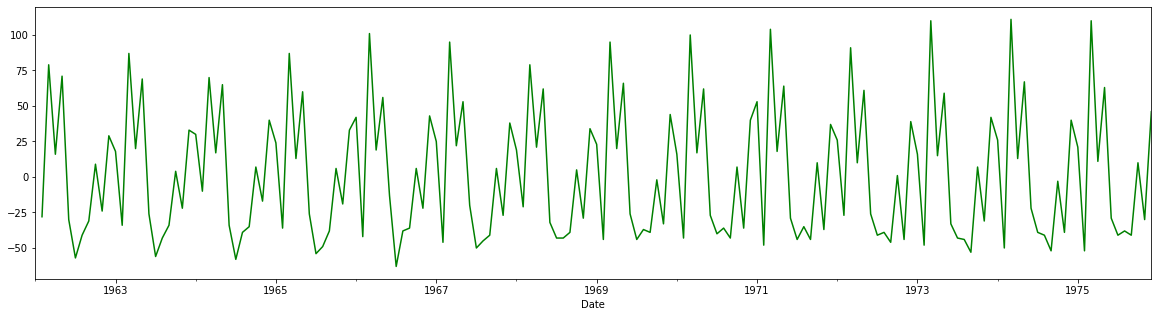

In [154]:
data['Diffrence Prediction'].plot(kind='line',figsize=(20,5),color='g')
plt.show()

In [155]:
is_stationary(data['Diffrence Prediction'].dropna())

0.030068004001782334
It is Stationary Series.


## Start with FBprophet Library

In [156]:
from fbprophet import Prophet

In [157]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_column_matrix',
 'sample_model',
 'samp

In [176]:
data1=data.drop(columns=['Production Of Milk','Date']).reset_index()
data1.head()
data1.columns = ['ds','y']
data1.head()

,ds,y
0,1962-01-01,NaN
1,1962-02-01,-28.0
2,1962-03-01,79.0
3,1962-04-01,16.0
4,1962-05-01,71.0


Move To Train model.
- It required the two columns that is time columns and diffrence prediction colunns.
- It is mendatory.

In [177]:
model = Prophet()
model.fit(data1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [179]:
model.seasonalities

OrderedDict([('yearly',
              {'condition_name': None,
               'fourier_order': 10,
               'mode': 'additive',
               'period': 365.25,
               'prior_scale': 10.0})])

In [180]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [182]:
## Create the future dates of 365 days
future_dataframe=model.make_future_dataframe(periods=365,freq='D')
future_dataframe.head()

,ds
0,1962-01-01
1,1962-02-01
2,1962-03-01
3,1962-04-01
4,1962-05-01


In [183]:
future_dataframe.tail()

,ds
528,1976-11-26
529,1976-11-27
530,1976-11-28
531,1976-11-29
532,1976-11-30


## In Order To Make Prediction Of Future dataframe.

In [184]:
prediction = model.predict(future_dataframe)
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,2.041572,18.046799,36.340227,2.041572,2.041572,24.993093,24.993093,24.993093,24.993093,24.993093,24.993093,0.0,0.0,0.0,27.034666
1,1962-02-01,2.039820,-48.555377,-28.789703,2.039820,2.039820,-40.256612,-40.256612,-40.256612,-40.256612,-40.256612,-40.256612,0.0,0.0,0.0,-38.216792
2,1962-03-01,2.038237,85.743397,104.129294,2.038237,2.038237,93.019787,93.019787,93.019787,93.019787,93.019787,93.019787,0.0,0.0,0.0,95.058024
3,1962-04-01,2.036485,7.510853,24.518581,2.036485,2.036485,14.325713,14.325713,14.325713,14.325713,14.325713,14.325713,0.0,0.0,0.0,16.362198
4,1962-05-01,2.034789,53.546748,71.684539,2.034789,2.034789,60.543482,60.543482,60.543482,60.543482,60.543482,60.543482,0.0,0.0,0.0,62.578271


-In the above we can see the values are avalible trends ,addtivtive which showing the cofidence level.
- yhat is the predicted values.

In [185]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
528,1976-11-26,12.847730,3.107386,22.841503
529,1976-11-27,18.294433,8.201403,26.926638
530,1976-11-28,23.873998,14.067895,33.057708
531,1976-11-29,29.473913,20.423084,39.294399
532,1976-11-30,34.975792,25.195929,44.143112


In [186]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1962-01-01,27.034666,18.046799,36.340227
1,1962-02-01,-38.216792,-48.555377,-28.789703
2,1962-03-01,95.058024,85.743397,104.129294
3,1962-04-01,16.362198,7.510853,24.518581
4,1962-05-01,62.578271,53.546748,71.684539


### Plot the predicted Forecasting.


Prophet has an inbuilt feature that enables us to plot the forecasts we just generated. This is achieved using model.plot() and passing in our forecasts as the argument. The blue line in the graph represents the predicted values while the black dots represents the data in our dataset.

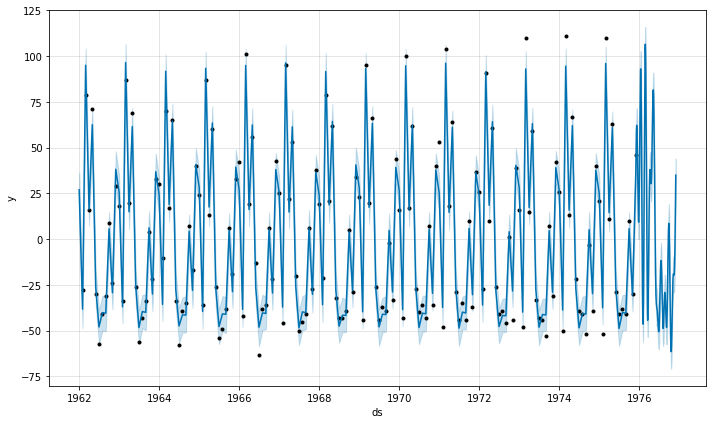

In [188]:
model.plot(prediction)
plt.show()

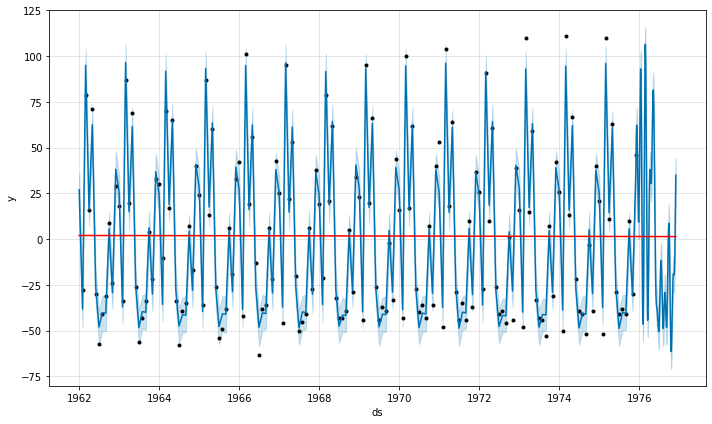

In [207]:
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(prediction)
a = add_changepoints_to_plot(fig.gca(),model,prediction)

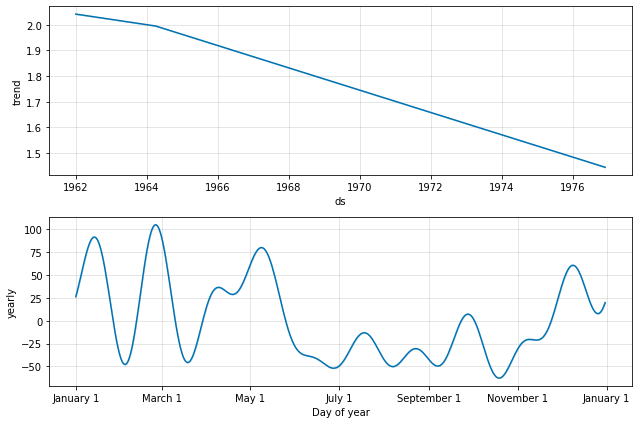

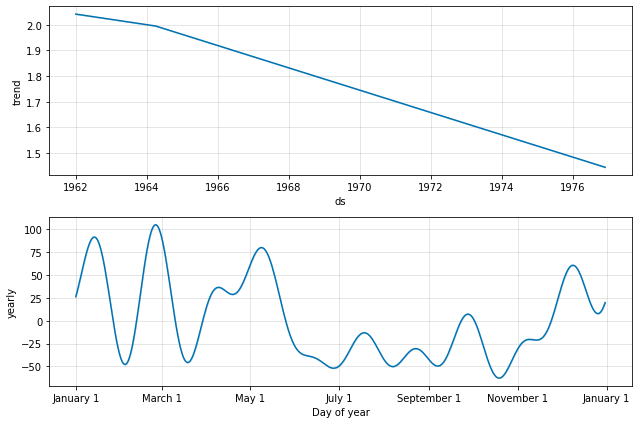

In [189]:
model.plot_components(prediction)

## Cross-Validate the model.

Next let’s measure the forecast error using the historical data. We’ll do this by comparing the predicted values with the actual values. In order to perform this operation we select cut of points in the history of the data and fit the model with data upto that cut off point. Afterwards we compare the actual values to the predicted values. The cross_validation method allows us to do this in Prophet. This method take the following parameters as explained below:

- horizon the forecast horizon
- initial the size of the initial training period
- period the spacing between cutoff dates


In [190]:
from fbprophet.diagnostics import cross_validation

Cross-Validation for time series.

Computes forecasts from historical cutoff points.

Beginning from (end - horizon), works backwards making cutoffs with a spacing of period until initial is reached.

When period is equal to the time interval of the data, this is the technique described in https://robjhyndman.com/hyndsight/tscv/ .

- model: Prophet class object. Fitted Prophet model horizon: string with pd.Timedelta compatible style, e.g., '5 days',

    '3 hours', '10 seconds'.  
- period: string with pd.Timedelta compatible style. Simulated forecast will

    be done at every this period. If not provided, 0.5 * horizon is used.  
- initial: string with pd.Timedelta compatible style. The first training

    period will begin here. If not provided, 3 * horizon is used





In [191]:
data1.shape

(168, 2)

- Next let’s measure the forecast error using the historical data. We’ll do this by comparing the predicted values with the actual values. In order to perform this operation we select cut of points in the history of the data and fit the model with data upto that cut off point. Afterwards we compare the actual values to the predicted values. The cross_validation method allows us to do this in Prophet. This method take the following parameters as explained below:

 - horizon the forecast horizon
 - initial the size of the initial training period
 - period the spacing between cutoff dates

 horizon = 'dates we want to predict'
 period = 0.5*horizon
 initial = 3.*horizon.
 

In [193]:
df_cv=cross_validation(model,horizon="365 days",period='180 days',initial='1095 days',)
#step taken the 365 that is historical data.
#backward cutoff of spacing the by period days 
#upto the initial

INFO:fbprophet:Making 20 forecasts with cutoffs between 1965-07-21 00:00:00 and 1974-12-01 00:00:00


Computes forecasts from historical cutoff points. Beginning from (end date - horizon date), works backwards making cutoffs with a spacing of period until initial is reached.


In [201]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-08-01,-40.898372,-46.369679,-35.799511,-49.0,1965-07-21
1,1965-09-01,-34.869323,-40.264885,-29.322274,-38.0,1965-07-21
2,1965-10-01,6.103171,0.608197,12.113436,6.0,1965-07-21
3,1965-11-01,-20.281526,-26.103270,-15.339712,-19.0,1965-07-21
4,1965-12-01,36.035431,30.829861,41.537268,33.0,1965-07-21


In [202]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
235,1975-08-01,-40.690468,-50.433088,-30.929622,-38.0,1974-12-01
236,1975-09-01,-40.660692,-49.800932,-31.456928,-41.0,1974-12-01
237,1975-10-01,4.677703,-4.714029,14.549782,10.0,1974-12-01
238,1975-11-01,-30.746168,-39.825254,-20.988027,-30.0,1974-12-01
239,1975-12-01,34.634447,25.869100,43.610061,46.0,1974-12-01


In [203]:
from fbprophet.diagnostics import performance_metrics
performance = performance_metrics(df_cv)
performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,41 days,122.892400,11.085684,9.118404,0.262197,0.196477,0.458333
1,42 days,114.799171,10.714438,8.573807,0.232545,0.176999,0.541667
2,43 days,123.148319,11.097221,8.821147,0.226243,0.176999,0.541667
3,46 days,89.252498,9.447354,7.880267,0.213580,0.176999,0.583333
4,47 days,87.227763,9.339580,7.694600,0.210425,0.176999,0.604167


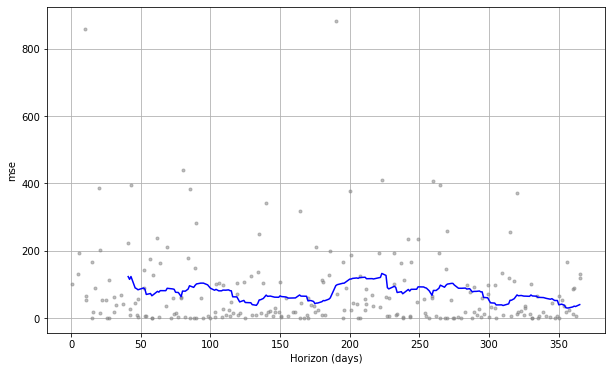

In [205]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv,metric='mse')

## - FBprophet work on the seasonality data internaliy.
##- So there is no need to do shifting in order to make prediction .

## Thank You !!